### Deaeration for Tanks 26 MT

In [2]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Supress Warnings
import warnings 
warnings.filterwarnings('ignore')
#The last line of code helps in suppressing the unnecessary warnings.
from scipy import stats
import seaborn as sns

In [3]:
# Data Collection:
# Using the Specify Absolute Path: If the file is located in a different directory, you can specify the absolute path to the file when reading it using pd.read_csv():
import pandas as pd
file_path = r'C:\Users\User\Desktop\Thesis 2023\Capstone---CCT\Python Working Notebooks\ProductionDataupdated1.csv'
ProductionTank = pd.read_csv(file_path)

In [4]:
ProductionTank

,Unnamed: 0,Material,BATCHID,Tank_1,Instruction_Step,INGRED_ID,INGRED_Name,Quantity,Phase_start,Phase_end,Phase_duration,Phase_start_delay,Phase_row_no,Flowrate_KGMIN,Target_Flowrate,Target_Phase_duration,Phase_overrun,Deaeration Phase
0,0,1002150,107643491,2503,S3_BATCH_IN_PROGRESS,NaN,NaN,0.000,09/03/2022 10:42,09/03/2022 10:42,0,0,1,0.0000,NaN,0,NaN,0
1,1,1002150,107643491,2503,STEP1_CONS,1002565,WATER TREATED,5760.000,09/03/2022 10:42,09/03/2022 11:16,34,0,2,169.4118,733.5050,8,26.0,0
2,2,1002150,107643491,2503,PLEASE VERIFY BULK ADDITION,NaN,NaN,0.000,09/03/2022 11:16,09/03/2022 11:17,1,0,3,0.0000,NaN,3,0.0,0
3,3,1002150,107643491,2503,STEP1_CONS,1037802,S813 SOD BENZOATE XFX25,5.629,09/03/2022 11:17,09/03/2022 11:27,10,0,4,0.5629,6.3182,1,9.0,0
4,4,1002150,107643491,2503,STEP1_CONS,1002818,S651 CITRIC ACID ANH BG XFX25,78.766,09/03/2022 11:27,09/03/2022 11:38,11,0,5,7.1605,6.3182,12,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9482,9482,3055706,107737576,2502,TAKE A SAMPLE AND SUBMIT FOR QA.,NaN,NaN,0.000,08/05/2022 11:43,08/05/2022 11:54,11,0,19,0.0000,NaN,10,1.0,0
9483,9483,3055706,107737576,2502,SAMPLE TO LAB. RESULTS OK? (NO TO HOMOGENISE),NaN,NaN,0.000,08/05/2022 11:54,08/05/2022 11:55,1,0,20,0.0000,NaN,10,0.0,0
9484,9484,3055706,107737576,2502,STEP8_AGITATION,NaN,NaN,0.000,08/05/2022 11:56,08/05/2022 11:56,0,1,21,0.0000,NaN,0,0.0,0
9485,9485,3055706,107737576,2502,S4_BATCH_COMPLETE_QA_PENDING,NaN,NaN,0.000,08/05/2022 11:56,08/05/2022 11:56,0,0,22,0.0000,NaN,0,NaN,0


In [5]:
ProductionTank.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
import pandas as pd

Data = pd.DataFrame(ProductionTank)


In [7]:
Data.replace("STEP2_CONS", 
           "STEP2_CONS-Deaeration", 
           inplace=True)

In [8]:
print(Data[['Instruction_Step', 'Phase_start_delay']].isnull().sum())

Instruction_Step     25
Phase_start_delay     0
dtype: int64


In [9]:
filtered_data = Data[Data['Instruction_Step'] == 'STEP2_CONS-Deaeration']

#### Exploring the different deaeration times ( start Phase delay duration) for each of the groups of productions tanks and their common materials 

#### Deaeration in  Production Tanks : '2601','2603','2604'

In [10]:
tanks_in_group1 = ['2601','2603','2604']
instruction_step_of_interest = 'STEP2_CONS-Deaeration'

In [11]:
filtered_data = Data[(Data['Tank_1'].isin(tanks_in_group1)) & 
                    (Data['Instruction_Step'] == instruction_step_of_interest)]

In [12]:
common_materials = filtered_data.groupby('Material').filter(lambda x: x['Tank_1'].nunique() == len(tanks_in_group1))['Material'].unique()

In [13]:
filtered_data1 = filtered_data[filtered_data['Material'].isin(common_materials)]
#filtered_data1

In [14]:
# Calculate total phase duration for each desired instruction step for each tank and material
total_durations = filtered_data.groupby(['Tank_1', 'BATCHID','Instruction_Step'])['Phase_duration'].sum().reset_index()

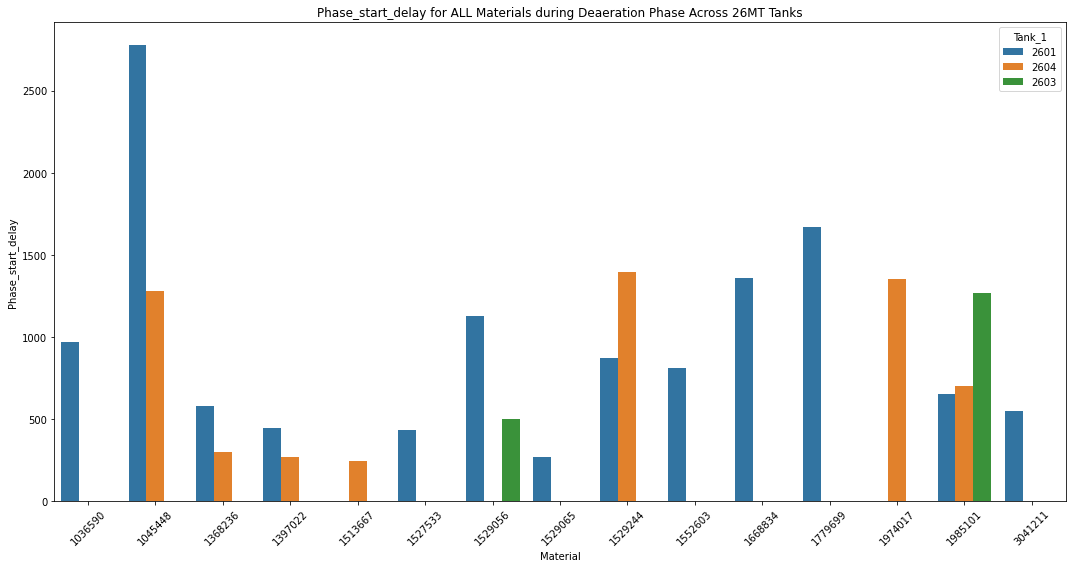

In [15]:
plt.figure(figsize=(15, 8))
sns.barplot(data=filtered_data, x='Material', y='Phase_start_delay', hue='Tank_1', ci=None)

plt.title('Phase_start_delay for ALL Materials during Deaeration Phase Across 26MT Tanks')
plt.ylabel('Phase_start_delay')
plt.xlabel('Material')
plt.legend(title='Tank_1', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

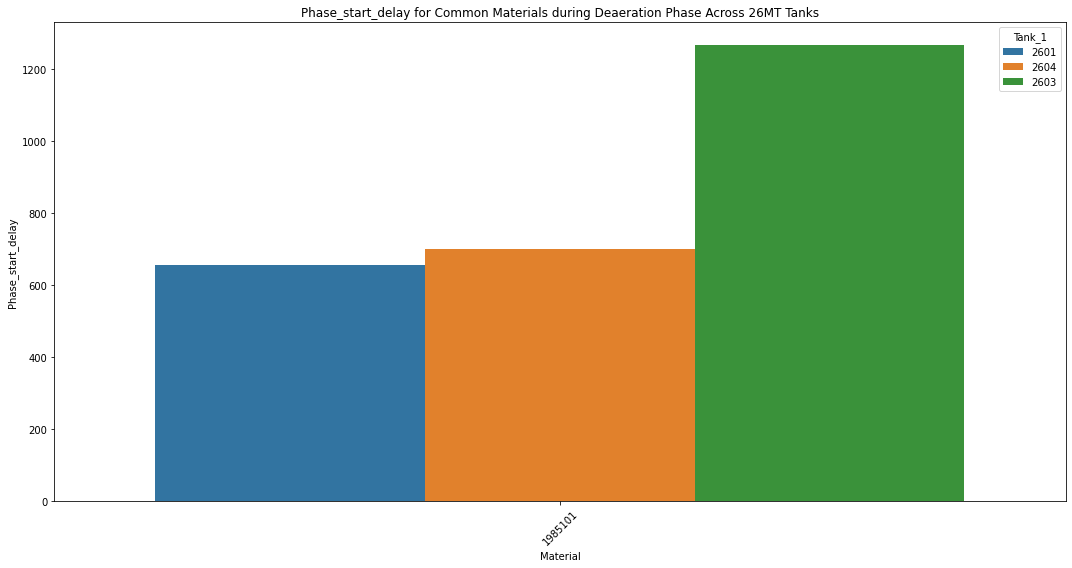

In [16]:
plt.figure(figsize=(15, 8))
sns.barplot(data=filtered_data1, x='Material', y='Phase_start_delay', hue='Tank_1', ci=None)

plt.title('Phase_start_delay for Common Materials during Deaeration Phase Across 26MT Tanks')
plt.ylabel('Phase_start_delay')
plt.xlabel('Material')
plt.legend(title='Tank_1', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
#ingredient_of_interest = ['1461896', '1254972','1031006','1243269','1196706','1815609']
#ingredient_data = data[data['INGRED_ID'] == ingredient_of_interest]

In [28]:
import pandas as pd
from tabulate import tabulate


data = pd.DataFrame(ProductionTank)
specific_tanks = ['2601','2603','2604']

# Filter the dataframe for desired instruction steps
desired_steps = ['STEP2_CONS-Deaeration']
filtered_data = Data[(Data['Instruction_Step'].isin(desired_steps)) & (Data['Tank_1'].isin(specific_tanks))]


# Calculate total phase duration for each desired instruction step for each tank and material
total_Phase_start_delay = filtered_data.groupby(['Tank_1','BATCHID','Instruction_Step'])['Phase_start_delay'].sum().reset_index()

# Present in table format
#print(tabulate(total_durations, headers='keys', tablefmt='grid'))



#Aggregate data per tank
aggregated_total_durations_df2 = filtered_data.groupby(['Tank_1','BATCHID','Material']).agg({
  #  'BATCHID': 'count',
    # 'Material': 'count',
    'Phase_duration': 'sum',
    'Phase_overrun': 'sum',
    'Phase_start_delay':'sum',
    'Quantity':'sum',
    'Flowrate_KGMIN':'sum',
    'Target_Phase_duration':'mean',
    'Target_Flowrate':'mean'
}).reset_index()


#print(aggregated_total_durations_df2)
print(total_Phase_start_delay)


aggregated_total_durations_df2.to_csv('DeaerationPhase26MT.csv', index=False)


   Tank_1    BATCHID       Instruction_Step  Phase_start_delay
0    2601  107579279  STEP2_CONS-Deaeration               1064
1    2601  107609604  STEP2_CONS-Deaeration                432
2    2601  107628743  STEP2_CONS-Deaeration               1425
3    2601  107657881  STEP2_CONS-Deaeration               1260
4    2601  107671161  STEP2_CONS-Deaeration                718
5    2601  107691051  STEP2_CONS-Deaeration                354
6    2601  107718990  STEP2_CONS-Deaeration                547
7    2601  107720157  STEP2_CONS-Deaeration                208
8    2601  107731815  STEP2_CONS-Deaeration               1339
9    2601  107734265  STEP2_CONS-Deaeration                845
10   2601  107743160  STEP2_CONS-Deaeration               6328
11   2601  107748062  STEP2_CONS-Deaeration               1218
12   2601  107769534  STEP2_CONS-Deaeration                702
13   2601  107784321  STEP2_CONS-Deaeration               1672
14   2601  107792342  STEP2_CONS-Deaeration            

In [19]:
import pandas as pd
from tabulate import tabulate


data = pd.DataFrame(ProductionTank)
specific_tanks = ['2601','2603','2604']

# Filter the dataframe for desired instruction steps
desired_steps = ['STEP2_CONS-Deaeration']
filtered_data = Data[(Data['Instruction_Step'].isin(desired_steps)) & (Data['Tank_1'].isin(specific_tanks))]


# Calculate total phase duration for each desired instruction step for each tank and material
total_Phase_start_delay = filtered_data.groupby(['Tank_1','Material','Instruction_Step'])['Phase_start_delay'].sum().reset_index()

# Present in table format
#print(tabulate(total_durations, headers='keys', tablefmt='grid'))



#Aggregate data per tank
aggregated_total_durations_df2 = filtered_data.groupby(['Tank_1','BATCHID','Material']).agg({
  #  'BATCHID': 'count',
    # 'Material': 'count',
    'Phase_duration': 'sum',
    'Phase_overrun': 'sum',
    'Phase_start_delay':'sum',
    'Quantity':'sum',
    'Flowrate_KGMIN':'sum',
    'Target_Phase_duration':'mean',
    'Target_Flowrate':'mean'
}).reset_index()


print(aggregated_total_durations_df2)
aggregated_total_durations_df2.to_csv('DeaerationPhase25MT.csv', index=False)

   Tank_1    BATCHID  Material  Phase_duration  Phase_overrun  \
0    2601  107579279   1985101              14            9.0   
1    2601  107609604   1527533              25           21.0   
2    2601  107628743   1529056               5            0.0   
3    2601  107657881   1985101               8            3.0   
4    2601  107671161   1036590               9            4.0   
5    2601  107691051   1985101               8            3.0   
6    2601  107718990   3041211               9            4.0   
7    2601  107720157   1985101               3            0.0   
8    2601  107731815   1036590              18           13.0   
9    2601  107734265   1985101               8            3.0   
10   2601  107743160   1045448              40           35.0   
11   2601  107748062   1368236              26           18.0   
12   2601  107769534   1036590               8            3.0   
13   2601  107784321   1779699               4            0.0   
14   2601  107792342   15

In [20]:
# Handling missing values
#aggregated_total_durations_df2.dropna(inplace=True)  # Remove rows with missing values

In [21]:
# Handling du# Handling duplicates
#aggregated_total_durations_df2.drop_duplicates(inplace=True)  # Remove duplicate rowsplicates

In [22]:
# Define columns where you want to detect and remove outliers
ProductionTank26_df = pd.DataFrame(aggregated_total_durations_df2)
ProductionTank26_df
columns_to_check = ['Phase_duration', 'Phase_overrun', 'Phase_start_delay', 'Flowrate_KGMIN', 'Target_Phase_duration']

# Define a function to remove outliers using IQR
def remove_outliers_iqr(data, column, iqr_multiplier=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - iqr_multiplier * IQR
    upper_bound = Q3 + iqr_multiplier * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers for each column
for col in columns_to_check:
  ProductionTank26_df = remove_outliers_iqr(ProductionTank26_df, col)
# Display the cleaned DataFrame
print(ProductionTank26_df)

   Tank_1    BATCHID  Material  Phase_duration  Phase_overrun  \
0    2601  107579279   1985101              14            9.0   
3    2601  107657881   1985101               8            3.0   
4    2601  107671161   1036590               9            4.0   
5    2601  107691051   1985101               8            3.0   
6    2601  107718990   3041211               9            4.0   
8    2601  107731815   1036590              18           13.0   
9    2601  107734265   1985101               8            3.0   
12   2601  107769534   1036590               8            3.0   
14   2601  107792342   1529065               7            2.0   
15   2601  107795797   1985101               8            3.0   
19   2601  107831957   1985101               5            0.0   
20   2601  107842003   1036590              11            6.0   
21   2601  107873947   1045448              13            8.0   
24   2601  107913400   1036590              21           16.0   
25   2601  107924004   19

In [23]:
# Scaling numerical variables (if needed)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['Phase_duration', 'Phase_overrun', 'Phase_start_delay', 'Flowrate_KGMIN']
ProductionTank26_df[numerical_cols] = scaler.fit_transform(ProductionTank26_df[numerical_cols])
print(ProductionTank26_df)

   Tank_1    BATCHID  Material  Phase_duration  Phase_overrun  \
0    2601  107579279   1985101        0.123824       0.123824   
3    2601  107657881   1985101       -0.647692      -0.647692   
4    2601  107671161   1036590       -0.519106      -0.519106   
5    2601  107691051   1985101       -0.647692      -0.647692   
6    2601  107718990   3041211       -0.519106      -0.519106   
8    2601  107731815   1036590        0.638168       0.638168   
9    2601  107734265   1985101       -0.647692      -0.647692   
12   2601  107769534   1036590       -0.647692      -0.647692   
14   2601  107792342   1529065       -0.776278      -0.776278   
15   2601  107795797   1985101       -0.647692      -0.647692   
19   2601  107831957   1985101       -1.033451      -1.033451   
20   2601  107842003   1036590       -0.261934      -0.261934   
21   2601  107873947   1045448       -0.004762      -0.004762   
24   2601  107913400   1036590        1.023926       1.023926   
25   2601  107924004   19

In [24]:
# For the original DataFrame
print("Original DataFrame Summary Statistics:")
print(aggregated_total_durations_df2.describe())

# After removing outliers
print("\nCleaned DataFrame Summary Statistics:")
print(ProductionTank26_df.describe())

Original DataFrame Summary Statistics:
            BATCHID      Material  Phase_duration  Phase_overrun  \
count  4.600000e+01  4.600000e+01       46.000000      46.000000   
mean   1.078125e+08  1.533657e+06       19.173913      13.956522   
std    1.520487e+05  4.462251e+05       24.848254      24.337403   
min    1.075593e+08  1.036590e+06        3.000000       0.000000   
25%    1.077052e+08  1.045448e+06        7.000000       2.000000   
50%    1.077941e+08  1.529056e+06       11.000000       6.000000   
75%    1.079336e+08  1.985101e+06       21.750000      17.500000   
max    1.080818e+08  3.041211e+06      138.000000     129.000000   

       Phase_start_delay    Quantity  Flowrate_KGMIN  Target_Phase_duration  \
count          46.000000   46.000000       46.000000              46.000000   
mean         1093.608696  136.017804       15.778509               5.076087   
std          1229.323689   23.993988       11.918779               0.505167   
min           208.000000   84.87

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor
from tabulate import tabulate
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset (replace 'ProductionTank2203_df2' with your actual dataset)
df = pd.DataFrame(ProductionTank26_df)

# Define features and target
#X = df.drop(['Phase_start_delay'], axis=1)

#y = df['Phase_start_delay']

# Define features and target
X = df.drop(['Tank_1','BATCHID','Material','Target_Phase_duration','Target_Flowrate','Phase_overrun'], axis=1)
y = df['Phase_overrun']



# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2'])

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred_train = lr_model.predict(X_train)
lr_pred_test = lr_model.predict(X_test)
lr_train_mse = mean_squared_error(y_train, lr_pred_train)
lr_test_mse = mean_squared_error(y_test, lr_pred_test)
lr_train_r2 = r2_score(y_train, lr_pred_train)
lr_test_r2 = r2_score(y_test, lr_pred_test)
results_df = results_df.append({'Model': 'Linear Regression', 'Train MSE': lr_train_mse, 'Test MSE': lr_test_mse, 'Train R2': lr_train_r2, 'Test R2': lr_test_r2}, ignore_index=True)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred_train = ridge_model.predict(X_train)
ridge_pred_test = ridge_model.predict(X_test)
ridge_train_mse = mean_squared_error(y_train, ridge_pred_train)
ridge_test_mse = mean_squared_error(y_test, ridge_pred_test)
ridge_train_r2 = r2_score(y_train, ridge_pred_train)
ridge_test_r2 = r2_score(y_test, ridge_pred_test)
results_df = results_df.append({'Model': 'Ridge Regression', 'Train MSE': ridge_train_mse, 'Test MSE': ridge_test_mse, 'Train R2': ridge_train_r2, 'Test R2': ridge_test_r2}, ignore_index=True)

# Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
lasso_pred_train = lasso_model.predict(X_train)
lasso_pred_test = lasso_model.predict(X_test)
lasso_train_mse = mean_squared_error(y_train, lasso_pred_train)
lasso_test_mse = mean_squared_error(y_test, lasso_pred_test)
lasso_train_r2 = r2_score(y_train, lasso_pred_train)
lasso_test_r2 = r2_score(y_test, lasso_pred_test)
results_df = results_df.append({'Model': 'Lasso Regression', 'Train MSE': lasso_train_mse, 'Test MSE': lasso_test_mse, 'Train R2': lasso_train_r2, 'Test R2': lasso_test_r2}, ignore_index=True)

# RandomForest Regressor
#rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model = RandomForestRegressor(n_estimators=50, max_depth=10, min_samples_split=10, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred_train = rf_model.predict(X_train)
rf_pred_test = rf_model.predict(X_test)
rf_train_mse = mean_squared_error(y_train, rf_pred_train)
rf_test_mse = mean_squared_error(y_test, rf_pred_test)
rf_train_r2 = r2_score(y_train, rf_pred_train)
rf_test_r2 = r2_score(y_test, rf_pred_test)
results_df = results_df.append({'Model': 'Random Forest Regressor', 'Train MSE': rf_train_mse, 'Test MSE': rf_test_mse, 'Train R2': rf_train_r2, 'Test R2': rf_test_r2}, ignore_index=True)

# Gradient Boosting Regressor
#gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=50, learning_rate=0.05, max_depth=5, subsample=0.8, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred_train = gb_model.predict(X_train)
gb_pred_test = gb_model.predict(X_test)
gb_train_mse = mean_squared_error(y_train, gb_pred_train)
gb_test_mse = mean_squared_error(y_test, gb_pred_test)
gb_train_r2 = r2_score(y_train, gb_pred_train)
gb_test_r2 = r2_score(y_test, gb_pred_test)
results_df = results_df.append({'Model': 'Gradient Boosting Regressor', 'Train MSE': gb_train_mse, 'Test MSE': gb_test_mse, 'Train R2': gb_train_r2, 'Test R2': gb_test_r2}, ignore_index=True)


# Decision Tree Regressor
#dt_model = DecisionTreeRegressor(random_state=42)
dt_model = DecisionTreeRegressor(max_depth=10, min_samples_split=10, random_state=42)
dt_model.fit(X_train, y_train)
dt_pred_train = dt_model.predict(X_train)
dt_pred_test = dt_model.predict(X_test)
dt_train_mse = mean_squared_error(y_train, dt_pred_train)
dt_test_mse = mean_squared_error(y_test, dt_pred_test)
dt_train_r2 = r2_score(y_train, dt_pred_train)
dt_test_r2 = r2_score(y_test, dt_pred_test)
results_df = results_df.append({'Model': 'Decision Tree Regressor', 'Train MSE': dt_train_mse, 'Test MSE': dt_test_mse, 'Train R2': dt_train_r2, 'Test R2': dt_test_r2}, ignore_index=True)

# Bagging Regressor (based on Decision Trees by default)
bag_model = BaggingRegressor(n_estimators=100, random_state=42)
bag_model.fit(X_train, y_train)
bag_pred_train = bag_model.predict(X_train)
bag_pred_test = bag_model.predict(X_test)
bag_train_mse = mean_squared_error(y_train, bag_pred_train)
bag_test_mse = mean_squared_error(y_test, bag_pred_test)
bag_train_r2 = r2_score(y_train, bag_pred_train)
bag_test_r2 = r2_score(y_test, bag_pred_test)
results_df = results_df.append({'Model': 'Bagging Regressor', 'Train MSE': bag_train_mse, 'Test MSE': bag_test_mse, 'Train R2': bag_train_r2, 'Test R2': bag_test_r2}, ignore_index=True)

# AdaBoost Regressor
ada_model = AdaBoostRegressor(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)
ada_pred_train = ada_model.predict(X_train)
ada_pred_test = ada_model.predict(X_test)
ada_train_mse = mean_squared_error(y_train, ada_pred_train)
ada_test_mse = mean_squared_error(y_test, ada_pred_test)
ada_train_r2 = r2_score(y_train, ada_pred_train)
ada_test_r2 = r2_score(y_test, ada_pred_test)
results_df = results_df.append({'Model': 'AdaBoost Regressor', 'Train MSE': ada_train_mse, 'Test MSE': ada_test_mse, 'Train R2': ada_train_r2, 'Test R2': ada_test_r2}, ignore_index=True)

# Extra Trees Regressor
et_model = ExtraTreesRegressor(n_estimators=100, random_state=42)
et_model.fit(X_train, y_train)
et_pred_train = et_model.predict(X_train)
et_pred_test = et_model.predict(X_test)
et_train_mse = mean_squared_error(y_train, et_pred_train)
et_test_mse = mean_squared_error(y_test, et_pred_test)
et_train_r2 = r2_score(y_train, et_pred_train)
et_test_r2 = r2_score(y_test, et_pred_test)
results_df = results_df.append({'Model': 'Extra Trees Regressor', 'Train MSE': et_train_mse, 'Test MSE': et_test_mse, 'Train R2': et_train_r2, 'Test R2': et_test_r2}, ignore_index=True)


# Print the results DataFrame
#print(results_df)
# Print the results DataFrame in tabulated form
print(tabulate(results_df, headers='keys', tablefmt='grid'))
# Save results DataFrame to an Excel file
results_df.to_excel('26DEresults.xlsx', index=False)


In [ ]:
# Create a list of models with their respective hyperparameters
# Initialize models
models = [
    LinearRegression(),
    Ridge(alpha=1.0),
    Lasso(alpha=1.0),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR(),
    MLPRegressor(),
    DecisionTreeRegressor(random_state=42),
    AdaBoostRegressor(n_estimators=100, random_state=42),
    BaggingRegressor(n_estimators=100, random_state=42)
]

# Perform cross-validation for each model
for model in models:
    model_name = model.__class__.__name__
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    mse_scores = -scores  # Convert negative MSE back to positive
    mean_mse = mse_scores.mean()
    std_mse = mse_scores.std()
    print(f"{model_name}:\n  Mean MSE: {mean_mse:.6f}\n  Std MSE: {std_mse:.6f}\n")

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Load your dataset (replace 'ProductionTank2202_df2' with your actual dataset)
df = pd.DataFrame(ProductionTank26_df)

# Define features and target
#X = df.drop(['Phase_overrun'], axis=1)
#y = df['Phase_overrun']

X = df.drop(['Tank_1','BATCHID','Material','Phase_start_delay','Target_Phase_duration','Target_Flowrate','Phase_overrun'], axis=1)
y = df['Phase_overrun']



# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2'])

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred_train = lr_model.predict(X_train)
lr_pred_test = lr_model.predict(X_test)
lr_train_mse = mean_squared_error(y_train, lr_pred_train)
lr_test_mse = mean_squared_error(y_test, lr_pred_test)
lr_train_r2 = r2_score(y_train, lr_pred_train)
lr_test_r2 = r2_score(y_test, lr_pred_test)
results_df = results_df.append({'Model': 'Linear Regression', 'Train MSE': lr_train_mse, 'Test MSE': lr_test_mse, 'Train R2': lr_train_r2, 'Test R2': lr_test_r2}, ignore_index=True)

# Ridge Regression with Hyperparameter Tuning
ridge_params = {'alpha': [0.01, 0.1, 1.0, 10.0]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5)
ridge_grid.fit(X_train, y_train)
best_ridge = ridge_grid.best_estimator_
ridge_pred_train = best_ridge.predict(X_train)
ridge_pred_test = best_ridge.predict(X_test)
ridge_train_mse = mean_squared_error(y_train, ridge_pred_train)
ridge_test_mse = mean_squared_error(y_test, ridge_pred_test)
ridge_train_r2 = r2_score(y_train, ridge_pred_train)
ridge_test_r2 = r2_score(y_test, ridge_pred_test)
results_df = results_df.append({'Model': 'Ridge Regression', 'Train MSE': ridge_train_mse, 'Test MSE': ridge_test_mse, 'Train R2': ridge_train_r2, 'Test R2': ridge_test_r2}, ignore_index=True)

# Lasso Regression with Hyperparameter Tuning
lasso_params = {'alpha': [0.01, 0.1, 1.0, 10.0]}
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5)
lasso_grid.fit(X_train, y_train)
best_lasso = lasso_grid.best_estimator_
lasso_pred_train = best_lasso.predict(X_train)
lasso_pred_test = best_lasso.predict(X_test)
lasso_train_mse = mean_squared_error(y_train, lasso_pred_train)
lasso_test_mse = mean_squared_error(y_test, lasso_pred_test)
lasso_train_r2 = r2_score(y_train, lasso_pred_train)
lasso_test_r2 = r2_score(y_test, lasso_pred_test)
results_df = results_df.append({'Model': 'Lasso Regression', 'Train MSE': lasso_train_mse, 'Test MSE': lasso_test_mse, 'Train R2': lasso_train_r2, 'Test R2': lasso_test_r2}, ignore_index=True)

# Random Forest Regressor with Hyperparameter Tuning
rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]}
rf_grid = GridSearchCV(RandomForestRegressor(), rf_params, cv=5)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
rf_pred_train = best_rf.predict(X_train)
rf_pred_test = best_rf.predict(X_test)
rf_train_mse = mean_squared_error(y_train, rf_pred_train)
rf_test_mse = mean_squared_error(y_test, rf_pred_test)
rf_train_r2 = r2_score(y_train, rf_pred_train)
rf_test_r2 = r2_score(y_test, rf_pred_test)
rf_feature_importance = rf_model.feature_importances_
results_df = results_df.append({'Model': 'Random Forest Regressor', 'Train MSE': rf_train_mse, 'Test MSE': rf_test_mse, 'Train R2': rf_train_r2, 'Test R2': rf_test_r2}, ignore_index=True)

# Gradient Boosting Regressor with Hyperparameter Tuning
gb_params = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 4, 5]}
gb_grid = GridSearchCV(GradientBoostingRegressor(), gb_params, cv=5)
gb_grid.fit(X_train, y_train)
best_gb = gb_grid.best_estimator_
gb_pred_train = best_gb.predict(X_train)
gb_pred_test = best_gb.predict(X_test)
gb_train_mse = mean_squared_error(y_train, gb_pred_train)
gb_test_mse = mean_squared_error(y_test, gb_pred_test)
gb_train_r2 = r2_score(y_train, gb_pred_train)
gb_test_r2 = r2_score(y_test, gb_pred_test)
gb_feature_importance = rf_model.feature_importances_
results_df = results_df.append({'Model': 'Gradient Boosting Regressor', 'Train MSE': gb_train_mse, 'Test MSE': gb_test_mse, 'Train R2': gb_train_r2, 'Test R2': gb_test_r2}, ignore_index=True)

# Decision Tree Regressor with Hyperparameter Tuning
dt_params = {'max_depth': [None, 10, 20]}
dt_grid = GridSearchCV(DecisionTreeRegressor(), dt_params, cv=5)
dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_
dt_pred_train = best_dt.predict(X_train)
dt_pred_test = best_dt.predict(X_test)
dt_train_mse = mean_squared_error(y_train, dt_pred_train)
dt_test_mse = mean_squared_error(y_test, dt_pred_test)
dt_train_r2 = r2_score(y_train, dt_pred_train)
dt_test_r2 = r2_score(y_test, dt_pred_test)
results_df = results_df.append({'Model': 'Decision Tree Regressor', 'Train MSE': dt_train_mse, 'Test MSE': dt_test_mse, 'Train R2': dt_train_r2, 'Test R2': dt_test_r2}, ignore_index=True)


# Bagging Regressor with Hyperparameter Tuning
bag_params = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}

bag_grid = GridSearchCV(BaggingRegressor(random_state=42), bag_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
bag_grid.fit(X_train, y_train)
bag_best = bag_grid.best_estimator_

# Using the best estimator from GridSearch to make predictions
bag_pred_train = bag_best.predict(X_train)
bag_pred_test = bag_best.predict(X_test)
bag_train_mse = mean_squared_error(y_train, bag_pred_train)
bag_test_mse = mean_squared_error(y_test, bag_pred_test)
bag_train_r2 = r2_score(y_train, bag_pred_train)
bag_test_r2 = r2_score(y_test, bag_pred_test)
results_df = results_df.append({'Model': 'Bagging Regressor', 'Train MSE': bag_train_mse, 'Test MSE': bag_test_mse, 'Train R2': bag_train_r2, 'Test R2': bag_test_r2}, ignore_index=True)


# AdaBoost Regressor with Hyperparameter Tuning
ada_model = AdaBoostRegressor(n_estimators=100, random_state=42)
ada_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1]
}
ada_grid = GridSearchCV(AdaBoostRegressor(random_state=42), ada_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ada_model.fit(X_train, y_train)
ada_pred_train = ada_model.predict(X_train)
ada_pred_test = ada_model.predict(X_test)
ada_train_mse = mean_squared_error(y_train, ada_pred_train)
ada_test_mse = mean_squared_error(y_test, ada_pred_test)
ada_train_r2 = r2_score(y_train, ada_pred_train)
ada_test_r2 = r2_score(y_test, ada_pred_test)
results_df = results_df.append({'Model': 'AdaBoost Regressor', 'Train MSE': ada_train_mse, 'Test MSE': ada_test_mse, 'Train R2': ada_train_r2, 'Test R2': ada_test_r2}, ignore_index=True)




# Print the results DataFrame
print(results_df)
# Print the results DataFrame in tabulated form
print(tabulate(results_df, headers='keys', tablefmt='grid'))
# Save results DataFrame to an Excel file
results_df.to_excel('26DEresults.xlsx', index=False)